<h1><center><font size="6">Data Cleaning, EDA, and Feature Engineering Notebook</font></center></h1>

# <a id='0'>Contents</a>

- <a href='#2'>Importing Packages</a>  
- <a href='#3'>Uploading Data</a>
- <a href='#4'>Creating Train, Validation, and Testing Sets</a>  
- <a href='#5'>Data Cleaning</a>  
- <a href='#5'>Exploratory Data Analysis</a>
- <a href='#6'>Feature Engineering</a>  


# <a id:'1'>Importing Packages</a>

In [38]:
# Importing Packages
import numpy as np 
import pandas as pd
import re
import json
import requests
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use("fivethirtyeight")

from sklearn.model_selection import train_test_split

import pickle

# <a id='2'>Uploading Data</a>

In [39]:
df = pd.read_excel("../data/default of credit card clients.xls")
new_header = df.iloc[0]
df = df[1:] 
df.columns = new_header
df = df.rename(columns={"default payment next month": "default"}) 
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [40]:
df.dtypes

0
ID           object
LIMIT_BAL    object
SEX          object
EDUCATION    object
MARRIAGE     object
AGE          object
PAY_0        object
PAY_2        object
PAY_3        object
PAY_4        object
PAY_5        object
PAY_6        object
BILL_AMT1    object
BILL_AMT2    object
BILL_AMT3    object
BILL_AMT4    object
BILL_AMT5    object
BILL_AMT6    object
PAY_AMT1     object
PAY_AMT2     object
PAY_AMT3     object
PAY_AMT4     object
PAY_AMT5     object
PAY_AMT6     object
default      object
dtype: object

# <a id='4'>Creating Train, Validation, and Testing Sets</a>

In [41]:
X = df.drop(["default"], axis=1)
y = df["default"]
# split the full data 80:20 into training:validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)
# split training data 87.5:12.5 into training:testing sets
X_tr, X_tt, y_tr, y_tt = train_test_split(X_train, y_train, train_size=0.875, random_state=42)
train = pd.concat([X_tr, y_tr], axis=1)
val = pd.concat([X_val, y_val], axis=1)

In [42]:
# X_tt.to_csv("../data/testing.csv")
# y_tt.to_csv("../data/testing_labels.csv")
# train.to_csv("../data/training.csv", index=False)
# val.to_csv("../data/validate.csv", index=False)

# <a id='5'>Data Cleaning</a>

In [43]:
tr = pd.read_csv("../data/training.csv")
val = pd.read_csv("../data/validate.csv")
tr = tr.drop(["ID"], axis=1)
val = val.drop(["ID"], axis=1)
tr.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

In [44]:
tr.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,50000,2,2,1,44,0,0,0,0,0,0,45578,41906,35703,22360,23659,27421,3016,5003,3000,3000,5000,924,0
1,160000,2,3,1,46,-1,-1,-1,0,-1,-1,24904,2338,4856,4127,3995,842,2343,4856,1000,3995,842,26313,0
2,100000,2,2,1,47,-1,-1,-1,-1,-1,-2,6666,6666,0,6270,-396,-396,6666,0,6270,0,0,0,1
3,170000,2,2,1,29,0,0,0,0,0,0,79091,62575,63317,63903,43505,43995,2235,2493,2585,1683,1901,2111,0
4,150000,2,1,2,33,-2,-2,-2,-2,-2,-2,24393,26847,32702,33459,27800,2261,27007,32715,33475,27808,2261,169465,0


In [45]:
# look for anomalies in minimum and maximum values and peculiarities in interquartile values
tr.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,167214.937143,1.605190,1.854333,1.549476,35.538286,-0.015524,-0.130952,-0.165667,-0.216952,-0.261238,-0.284810,51115.879143,49164.750619,4.696772e+04,43174.979429,40376.466143,38976.187810,5732.100667,6.006080e+03,5279.434524,4927.353714,4822.283381,5156.729952,0.221714
std,129561.159854,0.488821,0.794086,0.523126,9.257936,1.127750,1.200066,1.194393,1.170611,1.136246,1.156573,73469.974615,71175.850265,6.960624e+04,64284.893891,61004.334726,59676.470266,17510.937498,2.508609e+04,18647.406220,16803.515819,15620.014696,17658.819827,0.415410
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3566.500000,3033.500000,2.743750e+03,2350.750000,1782.000000,1301.750000,1000.000000,8.360000e+02,390.000000,291.000000,243.000000,116.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22460.500000,21417.000000,2.007300e+04,19038.500000,18100.000000,17128.500000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66759.750000,63291.250000,5.969425e+04,54345.500000,50289.250000,49413.000000,5007.000000,5.000000e+03,4500.000000,4001.000000,4034.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,417990.000000,527143.000000,1.000000


In [46]:
# Use requests and json modules to webscrape current exchange rate for TWD to USD
url = 'https://openexchangerates.org/api/latest.json?app_id=c51b1508fb4145259b1c2fade72a2c04'
response = requests.get(url)
data = response.json()
rate = data['rates']['TWD']

In [49]:
# check for null values
data = [tr, val]
for d in data:
    print(d.isna().sum())

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


In [50]:
# change column names for easier reference
for d in data:    
    d.rename(columns={"PAY_0": "behind1", 
                        "PAY_2": "behind2", 
                        "PAY_3": "behind3", 
                        "PAY_4": "behind4",
                        "PAY_5": "behind5", 
                        "PAY_6": "behind6", 
                        "BILL_AMT1": "billed1", 
                        "BILL_AMT2": "billed2", 
                        "BILL_AMT3": "billed3", 
                        "BILL_AMT4": "billed4", 
                        "BILL_AMT5": "billed5", 
                        "BILL_AMT6": "billed6", 
                        "PAY_AMT1": "paid1", 
                        "PAY_AMT2": "paid2", 
                        "PAY_AMT3": "paid3", 
                        "PAY_AMT4": "paid4", 
                        "PAY_AMT5": "paid5", 
                        "PAY_AMT6": "paid6",
                        "SEX": "gender",
                        "EDUCATION": "education",
                        "MARRIAGE": "marriage",
                        "AGE": "age",
                        "LIMIT_BAL": "limit"}, inplace=True)

In [51]:
# Change all Taiwanese to US Dollars for better understanding for American audience
for d in data:
    d[['limit']] = d[['limit']]/rate
    d[['billed1', 'billed2', 'billed3', 'billed4', 'billed5', 'billed6']] = d[['billed1', 'billed2', 'billed3', 'billed4', 'billed5', 'billed6']].divide(rate, axis=1)
    d[['paid1', 'paid2', 'paid3', 'paid4', 'paid5', 'paid6']] = d[['paid1', 'paid2', 'paid3', 'paid4', 'paid5', 'paid6']].divide(rate, axis=1)

In [52]:
# Round all decimals to two decimal places to represent cents
for d in data:
    d['limit'] = d['limit'].apply(lambda x: round(x, 2))
    d[['billed1', 'billed2', 'billed3', 'billed4', 'billed5', 'billed6']] = d[['billed1', 'billed2', 'billed3', 'billed4', 'billed5', 'billed6']].apply(lambda x: round(x, 2))
    d[['paid1', 'paid2', 'paid3', 'paid4', 'paid5', 'paid6']] = d[['paid1', 'paid2', 'paid3', 'paid4', 'paid5', 'paid6']].apply(lambda x: round(x, 2))

In [53]:
# put all zero values into category of 3 (other) for marriage
# lump all the other and unknown education categories together:  0, 5, 6 values to category 4 (other)
for d in data:  
    d.replace({'marriage': {0:3}}, inplace=True)
    d.replace({'education': {5:4, 0:4, 6:4}}, inplace=True)

In [54]:
# -2 is the same as -1. but turn them all into 0's, since it makes more sense within context or meaning, i.e. client is zero months behind payment
datasets = ['behind1', 'behind2', 'behind3', 'behind4', 'behind5', 'behind6']
for data in datasets:
    tr.replace({data: {-2: 0, -1: 0}}, inplace=True)
    val.replace({data: {-2: 0, -1: 0}}, inplace=True)

## Pickle out baseline models

In [18]:
tr.head()

,limit,gender,education,marriage,age,behind1,behind2,behind3,behind4,behind5,behind6,billed1,billed2,billed3,billed4,billed5,billed6,paid1,paid2,paid3,paid4,paid5,paid6,default
0,1792.5,2,2,1,44,0,0,0,0,0,0,1633.97,1502.33,1279.95,801.61,848.18,983.04,108.12,179.36,107.55,107.55,179.25,33.13,0
1,5736.0,2,3,1,46,0,0,0,0,0,0,892.81,83.82,174.09,147.95,143.22,30.19,84.00,174.09,35.85,143.22,30.19,943.32,0
2,3585.0,2,2,1,47,0,0,0,0,0,0,238.98,238.98,0.00,224.78,-14.20,-14.20,238.98,0.00,224.78,0.00,0.00,0.00,1
3,6094.5,2,2,1,29,0,0,0,0,0,0,2835.41,2243.31,2269.91,2290.92,1559.65,1577.22,80.12,89.37,92.67,60.34,68.15,75.68,0
4,5377.5,2,1,2,33,0,0,0,0,0,0,874.49,962.47,1172.37,1199.51,996.63,81.06,968.20,1172.83,1200.08,996.92,81.06,6075.32,0


In [19]:
pickle_out = open("../data/training_cleaned.pickle","wb")
pickle.dump(tr, pickle_out)
pickle_out.close()

In [20]:
pickle_out = open("../data/validate_cleaned.pickle","wb")
pickle.dump(val, pickle_out)
pickle_out.close()

# <a id='6'>Exploratory Data Analysis</a>

In [55]:
# organize features into categorical and continuous
categorical = tr[['gender', 'marriage', 'education', 'behind1', 'behind2', 'behind3', 'behind4', 'behind5', 'behind6']]
continuous = tr[['limit', 'age', 'billed1', 'billed2', 'billed3', 'billed4', 'billed5', 'billed6', 'paid1', 'paid2', 'paid3', 'paid4', 'paid5', 'paid6']]
cat_col = categorical.columns
cont_col = continuous.columns

In [61]:
# display distributions of all the continuous variables

# con_1 = pd.melt(tr, value_vars = cont_col)
# sns.set_theme(style="darkgrid", font='serif', context='talk')
# g = sns.FacetGrid(con_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
# g = g.map(sns.distplot, 'value', color='r')
# g.set_xticklabels(rotation=45)
# g.fig.subplots_adjust(top=0.9)
# g.fig.suptitle("Distributions of Continuous Features")
# g.fig.tight_layout()
# plt.savefig("../images/distplot.png")

<img src="../images/distplot.png">

In [64]:
# Use bar graphs of the distribution of data for categorical variables

# cat_1 = pd.melt(tr, value_vars=cat_col)
# sns.set_theme(style="darkgrid", font='serif', context='talk')
# g = sns.FacetGrid(cat_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
# g = g.map(sns.countplot, 'value', color='dodgerblue')
# g.set_xticklabels()
# g.fig.subplots_adjust(top=0.9)
# g.fig.suptitle("Distributions of Categorical Features")
# g.fig.tight_layout()
# plt.savefig("../images/countplot.png")

<img src="../images/countplot.png">

In [77]:
yes = tr.default.sum()
no = len(tr)-yes
perc_y = round(yes/len(tr)*100, 1)
perc_n = round(no/len(tr)*100, 1)

# plt.figure(figsize=(8,6))
# sns.set_theme(style="darkgrid", font='serif', context='talk')
# sns.countplot('default', data=tr)
# plt.title('Credit Card Baseline Default', size=16)
# plt.box(False);
# plt.savefig("../images/baseline.png")

<img src="../images/baseline.png">

In [80]:
print("Number of Total Non-Defaulters: ", yes)
print("Number of Defaulters: ", no)
print("Percentage of Non-Defaulters: ", perc_y)
print("Percentage of Defaulters: ", perc_n)

pd.DataFrame
default = pd.DataFrame(data = {"Training Dataset": [yes, no, perc_y, perc_n]}, 
                       index = ["Number of Total Non-Defaulters: ", "Number of Defaulters: ", "Percentage of Non-Defaulters: ", "Percentage of Defaulters: "])
default

Number of Total Non-Defaulters:  4656
Number of Defaulters:  16344
Percentage of Non-Defaulters:  22.2
Percentage of Defaulters:  77.8


,Training Dataset
Number of Total Non-Defaulters:,4656.0
Number of Defaulters:,16344.0
Percentage of Non-Defaulters:,22.2
Percentage of Defaulters:,77.8


In [26]:
# subset = tr[['gender', 'education', 'marriage', 'behind1', 'behind2', 'behind3', 'behind4', 'behind5', 'behind6', 'default']]
# f, axes = plt.subplots(3, 3, figsize=(15, 12), facecolor='white')
# sns.set_theme(style="darkgrid", font='serif', context='paper')
# f.suptitle('Frequency of Categorical Variables', size=16)
# ax1 = sns.countplot(x="gender", hue="default", data=subset, ax=axes[0,0])
# ax2 = sns.countplot(x="education", hue="default", data=subset, ax=axes[0,1])
# ax3 = sns.countplot(x="marriage", hue="default", data=subset, ax=axes[0,2])
# ax4 = sns.countplot(x="behind1", hue="default", data=subset, ax=axes[1,0])
# ax5 = sns.countplot(x="behind2", hue="default", data=subset, ax=axes[1,1])
# ax6 = sns.countplot(x="behind3", hue="default", data=subset, ax=axes[1,2])
# ax7 = sns.countplot(x="behind4", hue="default", data=subset, ax=axes[2,0])
# ax8 = sns.countplot(x="behind5", hue="default", data=subset, ax=axes[2,1])
# ax9 = sns.countplot(x="behind6", hue="default", data=subset, ax=axes[2,2])
# plt.savefig("../images/default_freq_by_cat.png")

<img src="../images/default_freq_by_cat.png">

In [27]:
# plt.figure(figsize = (14,6))
# plt.title('Distribution of Credit Limit', size=16)
# sns.set_theme(style="darkgrid", font='serif', context='poster')
# g = sns.distplot(tr['limit'], kde=True, bins=200, color="blue")
# plt.show()
# plt.savefig("../images/credit_limit.png")

<img src="../images/credit_limit.png">

In [28]:
# class_0 = tr.loc[tr['default'] == 0]["limit"]
# class_1 = tr.loc[tr['default'] == 1]["limit"]
# plt.figure(figsize = (14,6))
# plt.title('Credit Limit by Default', size=16)
# sns.set_theme(style="darkgrid", font='serif', context='poster')
# sns.distplot(class_1, kde=True, bins=200, color="dodgerblue", label="No")
# sns.distplot(class_0, kde=True, bins=200, color="red", label="Yes")
# plt.legend(title = 'default', loc='upper right', facecolor='white')
# plt.show()
# plt.savefig("../images/credit_limit_by_default.png")

<img src="../images/credit_limit_by_default.png">

In [83]:
# sns.boxplot(x="gender", hue="default", y="limit", data=tr, palette="tab10")
# plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
# plt.tight_layout()
# plt.title("Gender vs. Credit Limit for Defaulters and Non-defaulters", size=14)
# plt.savefig("../images/boxplot4.png")

<img src="../images/boxplot4.png">

In [85]:
# sns.boxplot(x='education', hue='default', y='limit', data=tr, palette='tab10')
# plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
# plt.tight_layout()
# plt.title("Education vs. Credit Limit for Defaulters and Non-defaulters", size=14)
# plt.savefig("../images/boxplot5.png")

<img src="../images/boxplot5.png">

In [87]:
# sns.boxplot(x='marriage', hue='default', y='limit', data=tr, palette='tab10')
# plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
# plt.tight_layout()
# plt.title("Marriage Status vs. Credit Limit for Defaulters and Non-defaulters", size=14)
# plt.savefig("../images/boxplot6.png")

<img src="../images/boxplot6.png">

In [89]:
sex = tr.groupby(['gender', 'default']).size().unstack(1)
sex

default,0,1
gender,,
1,6272,2019
2,10072,2637


In [99]:
# sns.set_theme(style="darkgrid", font='serif', context='poster')
# sex.plot(kind="bar", stacked=True)
# plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
# plt.title("Distribution Count for Gender and Default Status",size=14)
# plt.savefig("../images/stacked_bar.png")

<img src="../images/stacked_bar.png">

In [98]:
# sns.set_theme(style="darkgrid", font='serif', context='talk')
# sns.boxplot(x='default', y='age', data=tr, palette='tab10')
# plt.title("Distribution of Default Status by Age", size=14)
# plt.savefig("../images/boxplot1.png")

<img src="../images/boxplot1.png">

In [93]:
education = tr.groupby(['education', 'default']).size().unstack(1)
education

default,0,1
education,,
1,6013,1424
2,7408,2341
3,2626,866
4,297,25


In [97]:
# education.plot(kind="bar", stacked=True)
# plt.title("Distribution Count of Educational Level and Default Status", size=14)
# plt.savefig("../data/stacked_bar2.png")

<img src="../data/stacked_bar2.png">

In [96]:
# sns.boxplot(x='default', y='age', hue='education', data=tr, palette='tab10')
# plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
# plt.tight_layout()
# plt.title("Default Status vs. Age for Different Educational Status", size=14)
# plt.savefig("../images/boxplot3.png")

<img src="../images/boxplot3.png">

In [101]:
marriage = tr.groupby(['marriage', 'default']).size().unstack(1)
marriage

default,0,1
marriage,,
1,7354,2258
2,8778,2336
3,212,62


In [102]:
# sns.boxplot(x='default', y='age', hue='marriage', data=tr, palette='tab10')
# plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
# plt.tight_layout()
# plt.savefig("../images/boxplot2.png")

<img src="../images/boxplot2.png">

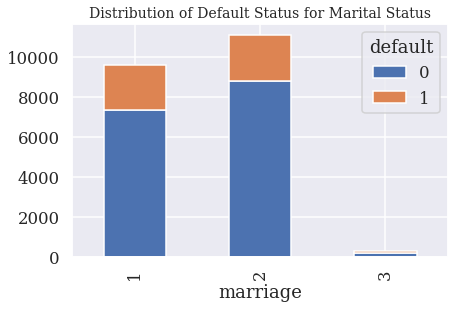

In [103]:
# marriage.plot(kind="bar", stacked=True)
# plt.title("Distribution of Default Status for Marital Status", size=14)
# plt.savefig("../images/stacked_bar3.png")

<img src="../images/stacked_bar2.png">

In [41]:
# g = sns.FacetGrid(tr, col='gender', hue='default')
# g.map(plt.hist, 'age', alpha=0.6, bins=50)
# g.add_legend()
# g.savefig("../images/gender_age.png")

<img src="../images/gender_age.png">

In [42]:
# sns.set_theme(style="darkgrid", font='serif', context='notebook')
# g = sns.FacetGrid(tr, col='gender', row="marriage", hue='default', sharey=False)
# g.map(plt.hist, 'age', alpha=0.3, bins=50)
# g.add_legend()
# g.savefig("../images/marriage_gender.png")

<img src="../images/marriage_gender.png">

In [43]:
# sns.set_theme(style="darkgrid", font='serif', context='talk')
# g = sns.pairplot(tr[['gender', 'education', 'marriage', 'limit', 'age', 'default']], 
#              hue="default", 
#              diag_kind="kde",
#              size=4);
# g.savefig("../images/pairplot1.png")

<img src="../images/pairplot1.png">

In [44]:
# 
# sns.set_theme(style="darkgrid", font='serif', context='talk')
# g = sns.pairplot(tr[['behind1', 'behind2', 'behind3', 'behind4', 'behind5', 'behind6', 'default']], 
#              hue="default", 
#              diag_kind="kde",
#              size=4)
# g.savefig("../images/pairplot2.png")

<img src="../images/pairplot2.png">

In [45]:
# plt.style.use("fivethirtyeight")
# sns.set_theme(style="darkgrid", font='serif', context='poster')
# g = sns.pairplot(tr[['billed1', 'billed2', 'billed3', 'billed4', 'billed5', 'billed6', 'default']], 
#              hue="default", 
#              diag_kind="kde",
#              size=4)
# g.savefig("../images/pairplot3.png")

<img src="../images/pairplot3.png">

In [46]:
# sns.set_theme(style="darkgrid", font='serif', context='talk')
# g = sns.pairplot(tr[['paid1', 'paid2', 'paid3', 'paid4', 'paid5', 'paid6', 'default']], 
#              hue="default", 
#              diag_kind="kde",
#              size=4)
# g.savefig("../images/pairplot4.png")

<img src="../images/pairplot4.png">

In [47]:
# plt.style.use("fivethirtyeight")
# sns.set_theme(style="darkgrid", font='serif', context='paper')
# plt.figure(figsize = (20,16))
# plt.title('Pearson Correlation of Features', y = 1.05, size = 20)
# # mask = np.zeros(tr.corr().shape, dtype=bool)
# # mask[np.triu_indices(len(mask))] = True
# g = sns.heatmap(tr.corr(), cmap='RdBu', annot=True, square=True, linecolor='white', linewidths=0.2, fmt=".1f")
# plt.savefig("../images/correlation_matrix.png")

# <a id='7'>Feature Engineering</a>

In [21]:
tr.head()

,limit,gender,education,marriage,age,behind1,behind2,behind3,behind4,behind5,behind6,billed1,billed2,billed3,billed4,billed5,billed6,paid1,paid2,paid3,paid4,paid5,paid6,default
0,1792.5,2,2,1,44,0,0,0,0,0,0,1633.97,1502.33,1279.95,801.61,848.18,983.04,108.12,179.36,107.55,107.55,179.25,33.13,0
1,5736.0,2,3,1,46,0,0,0,0,0,0,892.81,83.82,174.09,147.95,143.22,30.19,84.00,174.09,35.85,143.22,30.19,943.32,0
2,3585.0,2,2,1,47,0,0,0,0,0,0,238.98,238.98,0.00,224.78,-14.20,-14.20,238.98,0.00,224.78,0.00,0.00,0.00,1
3,6094.5,2,2,1,29,0,0,0,0,0,0,2835.41,2243.31,2269.91,2290.92,1559.65,1577.22,80.12,89.37,92.67,60.34,68.15,75.68,0
4,5377.5,2,1,2,33,0,0,0,0,0,0,874.49,962.47,1172.37,1199.51,996.63,81.06,968.20,1172.83,1200.08,996.92,81.06,6075.32,0


In [22]:
data = [tr, val]
for d in data:
    d['age_bin'] = 0
    d.loc[((d['age'] > 20) & (d['age'] < 30)) , 'age_bin'] = 1
    d.loc[((d['age'] >= 30) & (d['age'] < 60)) , 'age_bin'] = 2
    d.loc[((d['age'] >= 60) & (d['age'] < 81)) , 'age_bin'] = 3
    d['gen-mar'] = d['gender'] + d['marriage']
    d['gen-age'] = d['gender'] + d['age_bin']

In [23]:
# fraction of estimated available balance based on what is billed per month and credit limit
for d in data:
    d['avail6'] = (d.limit - d.billed6) / d.limit
    d['avail5'] = (d.limit - d.billed5) / d.limit
    d['avail4'] = (d.limit - d.billed4) / d.limit
    d['avail3'] = (d.limit - d.billed3) / d.limit
    d['avail2'] = (d.limit - d.billed2) / d.limit
    d['avail1'] = (d.limit - d.billed1) / d.limit
    d['avg_av'] = (d.avail1 + d.avail2 + d.avail3 + d.avail4 + d.avail5 + d.avail6) / 6

In [24]:
# the ratio of amount paid and amount billed
for d in data:
    d['pperb1'] = d.paid1 / d.billed2
    d['pperb2'] = d.paid2 / d.billed3
    d['pperb3'] = d.paid3 / d.billed4
    d['pperb4'] = d.paid4 / d.billed5
    d['pperb5'] = d.paid5 / d.billed6

In [25]:
datasets = ['pperb1', 'pperb2', 'pperb3', 'pperb4', 'pperb5']
for data in datasets:
    tr.replace({data: {np.inf: 0, np.nan: 0}}, inplace=True)
    val.replace({data: {np.inf: 0, np.nan: 0}}, inplace=True)

In [26]:
tr.head()

,limit,gender,education,marriage,age,behind1,behind2,behind3,behind4,behind5,behind6,billed1,billed2,billed3,billed4,billed5,billed6,paid1,paid2,paid3,paid4,paid5,paid6,default,age_bin,gen-mar,gen-age,avail6,avail5,avail4,avail3,avail2,avail1,avg_av,pperb1,pperb2,pperb3,pperb4,pperb5
0,1792.5,2,2,1,44,0,0,0,0,0,0,1633.97,1502.33,1279.95,801.61,848.18,983.04,108.12,179.36,107.55,107.55,179.25,33.13,0,2,3,4,0.451582,0.526817,0.552798,0.285941,0.161880,0.088441,0.344576,0.071968,0.140130,0.134167,0.126801,0.182343
1,5736.0,2,3,1,46,0,0,0,0,0,0,892.81,83.82,174.09,147.95,143.22,30.19,84.00,174.09,35.85,143.22,30.19,943.32,0,2,3,4,0.994737,0.975031,0.974207,0.969650,0.985387,0.844350,0.957227,1.002147,1.000000,0.242312,1.000000,1.000000
2,3585.0,2,2,1,47,0,0,0,0,0,0,238.98,238.98,0.00,224.78,-14.20,-14.20,238.98,0.00,224.78,0.00,0.00,0.00,1,2,3,4,1.003961,1.003961,0.937300,1.000000,0.933339,0.933339,0.968650,1.000000,0.000000,1.000000,-0.000000,-0.000000
3,6094.5,2,2,1,29,0,0,0,0,0,0,2835.41,2243.31,2269.91,2290.92,1559.65,1577.22,80.12,89.37,92.67,60.34,68.15,75.68,0,1,3,3,0.741206,0.744089,0.624100,0.627548,0.631912,0.534759,0.650602,0.035715,0.039372,0.040451,0.038688,0.043209
4,5377.5,2,1,2,33,0,0,0,0,0,0,874.49,962.47,1172.37,1199.51,996.63,81.06,968.20,1172.83,1200.08,996.92,81.06,6075.32,0,2,4,4,0.984926,0.814667,0.776939,0.781986,0.821019,0.837380,0.836153,1.005953,1.000392,1.000475,1.000291,1.000000


In [53]:
# plt.style.use("fivethirtyeight")
# sns.set_theme(style="darkgrid", font='serif', context='paper')
# plt.figure(figsize = (20,16))
# plt.title('Pearson Correlation of Features', y = 1.05, size = 20)
# # mask = np.zeros(tr.corr().shape, dtype=bool)
# # mask[np.triu_indices(len(mask))] = True
# g = sns.heatmap(tr.corr(), cmap='RdBu', square=True, linecolor='white', linewidths=0.2)
# plt.savefig("../images/correlation_matrix_2.png")


<img src="../images/correlation_matrix_2.png">

In [27]:
pickle_out = open("../data/training_features.pickle","wb")
pickle.dump(tr, pickle_out)
pickle_out.close()

In [28]:
pickle_out = open("../data/validate_features.pickle","wb")
pickle.dump(val, pickle_out)
pickle_out.close()

# After Feature Selection

In [32]:
tr = tr.drop(["gender","education", "marriage", "behind4", "behind5", "behind6", "gen-age", "gen-mar", "age_bin", "pperb1", "pperb2", "pperb3", "pperb4", "pperb5"], axis=1)

In [33]:
tr.head()

,limit,age,behind1,behind2,behind3,billed1,billed2,billed3,billed4,billed5,billed6,paid1,paid2,paid3,paid4,paid5,paid6,default,avail6,avail5,avail4,avail3,avail2,avail1,avg_av
0,1792.5,44,0,0,0,1633.97,1502.33,1279.95,801.61,848.18,983.04,108.12,179.36,107.55,107.55,179.25,33.13,0,0.451582,0.526817,0.552798,0.285941,0.161880,0.088441,0.344576
1,5736.0,46,0,0,0,892.81,83.82,174.09,147.95,143.22,30.19,84.00,174.09,35.85,143.22,30.19,943.32,0,0.994737,0.975031,0.974207,0.969650,0.985387,0.844350,0.957227
2,3585.0,47,0,0,0,238.98,238.98,0.00,224.78,-14.20,-14.20,238.98,0.00,224.78,0.00,0.00,0.00,1,1.003961,1.003961,0.937300,1.000000,0.933339,0.933339,0.968650
3,6094.5,29,0,0,0,2835.41,2243.31,2269.91,2290.92,1559.65,1577.22,80.12,89.37,92.67,60.34,68.15,75.68,0,0.741206,0.744089,0.624100,0.627548,0.631912,0.534759,0.650602
4,5377.5,33,0,0,0,874.49,962.47,1172.37,1199.51,996.63,81.06,968.20,1172.83,1200.08,996.92,81.06,6075.32,0,0.984926,0.814667,0.776939,0.781986,0.821019,0.837380,0.836153


In [34]:
val = val.drop(["gender","education", "marriage", "behind4", "behind5", "behind6", "gen-age", "gen-mar", "age_bin", "pperb1", "pperb2", "pperb3", "pperb4", "pperb5"], axis=1)

In [35]:
val.head()

,limit,age,behind1,behind2,behind3,billed1,billed2,billed3,billed4,billed5,billed6,paid1,paid2,paid3,paid4,paid5,paid6,default,avail6,avail5,avail4,avail3,avail2,avail1,avg_av
0,1075.5,25,0,0,0,317.77,360.72,415.18,450.99,491.72,531.58,53.78,71.70,53.78,53.78,53.78,71.70,0,0.505737,0.542799,0.580669,0.613966,0.664603,0.704537,0.602052
1,5377.5,26,0,0,0,4901.99,4504.59,4183.12,3641.68,2787.02,2769.91,160.82,151.82,113.32,94.89,95.68,95.68,0,0.484907,0.481726,0.322793,0.222107,0.162326,0.088426,0.293714
2,2509.5,32,0,0,0,2513.87,2476.52,2456.80,2500.65,2513.48,2517.10,87.15,111.57,107.55,87.40,89.63,91.56,0,-0.003028,-0.001586,0.003527,0.021000,0.013142,-0.001741,0.005219
3,4660.5,49,0,0,0,741.31,679.57,579.77,605.79,402.81,248.94,57.72,64.82,251.45,0.97,251.34,158.03,0,0.946585,0.913569,0.870016,0.875599,0.854185,0.840938,0.883482
4,1792.5,36,0,0,0,3378.07,1707.71,1518.64,701.73,727.58,696.89,71.70,53.78,35.85,64.53,0.00,35.85,1,0.611219,0.594098,0.608519,0.152781,0.047303,-0.884558,0.188227


In [36]:
pickle_out = open("../data/training_model.pickle","wb")
pickle.dump(tr, pickle_out)
pickle_out.close()

In [37]:
pickle_out = open("../data/validate_model.pickle","wb")
pickle.dump(val, pickle_out)
pickle_out.close()